In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [3]:
categories = ['comp.os.ms-windows.misc', 'rec.autos', 'sci.electronics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)

In [4]:
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [5]:
newsgroups_train.filenames.shape, newsgroups_test.filenames.shape

((2369,), (1577,))

In [6]:
newsgroups_train.filenames.shape[0]

2369

In [7]:
random_index = np.random.randint(0, newsgroups_train.filenames.shape[0]-1, 3)
print(random_index)

print("\n\n#================================#\n\n".join(np.array(newsgroups_train.data)[random_index]))

[ 336  485 1761]

Great speculation - I remember being proud on behalf of all the free
world (you think that way when you are seven years old) that we had
got there first. Now I'm almost sorry that it worked out that way.

I guess the soviets would have taken the victory seriously too, and
would almost certainly not have fallen victim to the complacency that
overtook the US program. Perhaps stretching to match US efforts would
have destabilized them sooner than it did in fact - and in the tradition
of Marvel Comics 'What If', this destabilization in the Brezhnev era might
have triggered the third world war. Hmm, maybe it was a giant leap after all.


#================================#


I don't want to get into a semantic argument, but contrary to some other
postings "near UV light" /is/ "actual UV light."  The "near" means that
it is close to the visible spectrum (i.e. of relatively long wavelength),
not that it is "nearly UV."  (I'm sure you can figure out now just what
"far UV" is.)

In [8]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[random_index]]

array(['sci.space', 'sci.electronics', 'sci.electronics'], dtype='<U23')

In [9]:
newsgroups_train.target[random_index]

array([3, 2, 2])

In [10]:
num_topics, num_top_words = 6, 8

# Stop words

In [11]:
from sklearn.feature_extraction import stop_words
sorted(list(stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

# Stemming and Lemmatization

In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rprilepskiy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
from nltk import stem

In [14]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [15]:
word_list = ['feet', 'foot', 'foots', 'footing']

In [16]:
[wnl.lemmatize(word) for word in word_list]

['foot', 'foot', 'foot', 'footing']

In [17]:
[porter.stem(word) for word in word_list]

['feet', 'foot', 'foot', 'foot']

## Small tasks

In [18]:
def get_lem_stem(w_list):
    w_list_lemmas = [wnl.lemmatize(word) for word in w_list]
    w_list_stemmed = [porter.stem(word) for word in w_list]
    
    print("Word list: {}".format(w_list))
    print("Lemmas list: {}".format(w_list_lemmas))
    print("Stemmed list: {}".format(w_list_stemmed))
    
    return w_list_lemmas, w_list_stemmed

In [19]:
t1 = ["fly", "flies", "flying"]
t2 = ["organize", "organizes", "organizing"]
t3 = ["universe", "university"]

t = [t1, t2, t3]

In [20]:
for w_list in t:
    _, _ = get_lem_stem(w_list)
    print()

Word list: ['fly', 'flies', 'flying']
Lemmas list: ['fly', 'fly', 'flying']
Stemmed list: ['fli', 'fli', 'fli']

Word list: ['organize', 'organizes', 'organizing']
Lemmas list: ['organize', 'organizes', 'organizing']
Stemmed list: ['organ', 'organ', 'organ']

Word list: ['universe', 'university']
Lemmas list: ['universe', 'university']
Stemmed list: ['univers', 'univers']



# Spacy

In [21]:
#!pip install spacy

In [22]:
#!python -m spacy download en_core_web_sm

In [23]:
import spacy

from spacy.lemmatizer import Lemmatizer
# from spacy.language import Lookups
from spacy.lookups import Lookups

In [24]:
nlp = spacy.load("en_core_web_sm")

In [25]:
lookups = Lookups() #nlp.vocab.lookups.tables

In [26]:
# nlp.vocab.lookups.get_table('lemma_lookup')

In [27]:
lemmatizer = Lemmatizer(lookups)

In [28]:
[lemmatizer.lookup(word) for word in word_list]

['feet', 'foot', 'foots', 'footing']

In [29]:
sorted(list(nlp.Defaults.stop_words))[:20]

["'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also']

# stop words in spacy but not in sklearn

In [30]:
set(nlp.Defaults.stop_words) - set(stop_words.ENGLISH_STOP_WORDS)

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'ca',
 'did',
 'does',
 'doing',
 'just',
 'make',
 "n't",
 'n‘t',
 'n’t',
 'quite',
 'really',
 'regarding',
 'say',
 'unless',
 'used',
 'using',
 'various',
 '‘d',
 '‘ll',
 '‘m',
 '‘re',
 '‘s',
 '‘ve',
 '’d',
 '’ll',
 '’m',
 '’re',
 '’s',
 '’ve'}

# stop words in sklearn but not in spacy

In [31]:
set(stop_words.ENGLISH_STOP_WORDS) - set(nlp.Defaults.stop_words)

{'amoungst',
 'bill',
 'cant',
 'co',
 'con',
 'couldnt',
 'cry',
 'de',
 'describe',
 'detail',
 'eg',
 'etc',
 'fill',
 'find',
 'fire',
 'found',
 'hasnt',
 'ie',
 'inc',
 'interest',
 'ltd',
 'mill',
 'sincere',
 'system',
 'thick',
 'thin',
 'un'}

# Data Processing

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [33]:
vectorizer = CountVectorizer(stop_words='english')

In [34]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vectors.shape

(2369, 50766)

In [35]:
print(len(newsgroups_train.data), vectors.shape)

2369 (2369, 50766)


In [36]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape

(50766,)

In [37]:
vocab[12000:12020]

array(['atmos', 'atmosphere', 'atmospheres', 'atmospheric',
       'atmospherics', 'atn', 'atng1', 'ato', 'atom', 'atomic', 'atomics',
       'atoms', 'atop', 'atr', 'atraction', 'atrophy', 'atru', 'ats',
       'att', 'attach'], dtype='<U81')

# SVD

In [38]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 19s, sys: 2.2 s, total: 1min 21s
Wall time: 15.2 s


In [39]:
print(U.shape, s.shape, Vh.shape)

(2369, 2369) (2369,) (2369, 50766)


In [40]:
print(vectors.shape)

(2369, 50766)


In [41]:
(U @ np.diag(s) @ Vh).shape

(2369, 50766)

In [42]:
reconstructed_vectors = U @ np.diag(s) @ Vh

In [43]:
np.linalg.norm(reconstructed_vectors - vectors)

4.9646140027312036e-11

# Check orthonormality

In [44]:
np.allclose(U.T @ U, np.eye(U.shape[0]))

True

In [45]:
np.allclose(Vh @ Vh.T, np.eye(Vh.shape[0]))

True

# Singular values

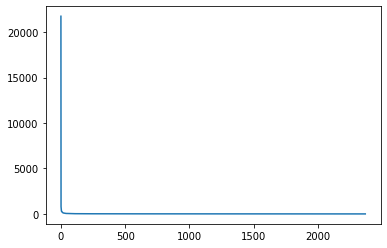

In [47]:
plt.plot(s);

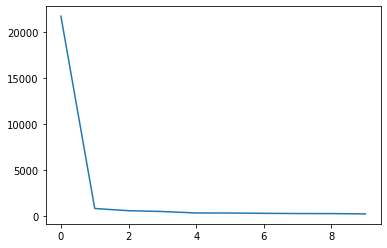

In [56]:
plt.plot(s[:10]);

# Show top words 

In [52]:
num_top_words = 15 

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [55]:
show_topics(Vh[:10])

['drl ironic tuna surreal yeager spliced trippy totalled ites xssr possiblity instability slater st6 gota',
 'g9v b8f a86 145 1d9 0t 2di pl 34u wm bxn 2tm giz 6um 1t',
 'cx w7 c_ t7 uw ck lk chz hz w1 17 mv k8 a7 s6',
 '145 0t b8f pl a86 34u 1t 3t 6um giz bxn 2tm 1d9 wm 2di',
 'ah air wire 75u wiring 7u b8 b9r 34u bh use 2pl 2di ahf ground',
 'ah 75u 7u b8 34u air b9r 2pl bh 2di ahf tl 2q 0d g9v',
 '145 b8f bhj a86 c_ bh 2di q5o 75 hj q45 45 ao au cx',
 'w7 uw pl 0t b8f t7 a7 a86 1t 3dy bxn w1 2pl tl 2q',
 'space launch satellite nasa data commercial satellites year market program earth mission lunar orbit shuttle',
 '75u a86 sl w7 uw ql 6um t7 04 a7 145 3dy 75 fyn b8f']